## Predicting car prices using K Nearest Neighbors

In this notebook we will explore the application of the K Nearest Neighbors Algorithm to predict the a car's market price. We will practice the machine learning workflow. The data set we will be working with contains information on various cars. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and download the data from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/).  

We will be using the following libraries in this project -
- Pandas for data operations.
- Scikit learn for Machine Learning
- Matplot lib for plotting\visualizations
- Numpy for data computations.

Please note that this project was part of the curriculum at [dataquest.io](https://www.dataquest.io) a data-science learning platform. 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

file = 'imports-85.data.txt'
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
               'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
               'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv(file, sep=',',header=None, names=column_names)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The next step is to identify continuous variable columns i.e. columns that have ordinal values that can be used to predict the prices. 
Luckily for us the data set description call's out the continuous variables.

In [134]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke',
                         'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


A cursory review of the data reveals that there are missing values in the normalized-losses column, i.e. some of the rows in the column contains '?'. We cannot have any missing values in the data if we want to use it for predictive modelling. Let's replace these values and look for other numeric columns that contain missing values.

In [135]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [136]:
# Convert all numeric column types to float, Because ? is a string value, columns containing the value were cast to the pandas
# object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be
# converted to numeric types.
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [137]:
# Since 'price' is the column we want to predict, let's remove any rows with missing price values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [138]:
# Replace missing values in other columns using column means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [139]:
# Confirm that there's no missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [140]:
# Normalize all columns to range from 0 to 1 except the target column
price_col = numeric_cars['price']
numeric_cars = (numeric_cars.max() - numeric_cars)/(numeric_cars.max())
numeric_cars['price'] = price_col
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,13495.0
1,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,16500.0
2,0.523438,0.218362,0.177319,0.090278,0.123746,0.305706,0.319797,0.167866,0.608696,0.412214,0.242424,0.612245,0.518519,16500.0
3,0.359375,0.174524,0.151370,0.080556,0.091973,0.425234,0.190355,0.184652,0.565217,0.610687,0.166667,0.510204,0.444444,13950.0
4,0.359375,0.177833,0.151370,0.077778,0.091973,0.305460,0.190355,0.184652,0.652174,0.561069,0.166667,0.632653,0.592593,17450.0


### Univariate Models -

Let's start with univariate models to asses which columns produce the least error. Starting with simple models before moving to more complex models help us structure the code worklfow and understand the features better.

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus 'price'), train a model, return RMSE value
# and add to the dictionary 'rmse_results'
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
# Create a series object from the dictionary so
# we can easily view the results and sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4007.472352
curb-weight          4437.934395
highway-mpg          4579.037250
width                4644.898429
city-mpg             4729.673421
length               5382.671155
wheel-base           5527.682489
compression-ratio    6736.676353
bore                 6816.853712
height               7487.652519
peak-rpm             7498.746475
normalized-losses    7635.170416
stroke               8078.491289
dtype: float64

Next, we will train the Univariate model using different K values, this exercise will allow us to determine which features produce the least average RMSE.

In [142]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model using default k value
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model
        predictions = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}

# For each column (minus 'price'), train a model, return RMSE value 
# and add to the disctionary 'rmse_results'
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val
    
k_rmse_results

{'bore': {1: 7496.1492312406444,
  3: 6936.9888741632003,
  5: 6816.8537123691885,
  7: 7062.0613050538341,
  9: 6869.7274373649016},
 'city-mpg': {1: 4540.3610032247389,
  3: 4662.4683767438482,
  5: 4729.6734209992692,
  7: 5099.2742894698586,
  9: 4999.2917237740958},
 'compression-ratio': {1: 9024.9026779536325,
  3: 7033.5529229950389,
  5: 6736.676353123451,
  7: 7459.1131944220724,
  9: 7219.385481303907},
 'curb-weight': {1: 5518.8832374058084,
  3: 5048.6077260366692,
  5: 4437.9343946355393,
  7: 4369.3490898512136,
  9: 4632.2055452210743},
 'height': {1: 9108.4718365936551,
  3: 8049.9871472883196,
  5: 7487.6525188849646,
  7: 7753.7974180840583,
  9: 7695.632426557866},
 'highway-mpg': {1: 5270.360471073066,
  3: 4618.1866223408379,
  5: 4579.0372499290315,
  7: 4914.2600028726101,
  9: 5181.9124189636359},
 'horsepower': {1: 3749.5962185254293,
  3: 3964.9503610053594,
  5: 4007.4723516831596,
  7: 4391.4816735297054,
  9: 4505.1886320053109},
 'length': {1: 5291.7851645

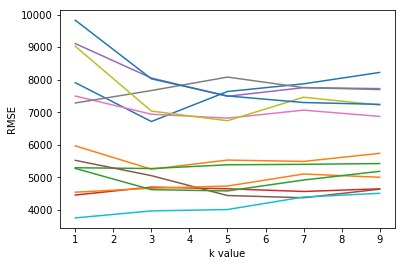

In [143]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    

### MultiVariate Models
Modify the knn_train_test function to accept a list of column names, modify the logic to use this parameter, instead of using single column for train and test, use all of the columns passed in.

In [144]:
# Compute average RMSE across different 'k' values for each features
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4123.737847
width                4600.272698
curb-weight          4801.395999
city-mpg             4806.213763
highway-mpg          4912.751353
length               5351.716651
wheel-base           5591.790931
bore                 7036.356112
compression-ratio    7494.726126
normalized-losses    7669.373476
stroke               7700.844238
peak-rpm             7977.094835
height               8019.108269
dtype: float64

From the above list, we can now select the best performing features.

In [145]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half as test set
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions using model
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results['two best features'] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six best features'] = rmse_val

k_rmse_results


{'five best features': {5: 3346.6737097607775},
 'four best features': {5: 3232.1036292326721},
 'six best features': {5: 3398.1290113563641},
 'three best features': {5: 3212.5596306057919},
 'two best features': {5: 3681.3980922556266}}

### Model Optimization
Let's now optimize the model that performed the best in the previous step.

- For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
- Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [146]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half as test set
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [ i for i in range(1,25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions using model
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}


four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six best features'] = rmse_val

k_rmse_results


{'five best features': {1: 2561.7319037195625,
  2: 2567.2749455482176,
  3: 2949.9007889192553,
  4: 3074.6091106298891,
  5: 3346.6737097607775,
  6: 3686.4646211770864,
  7: 3907.1959982578019,
  8: 4104.0339873177718,
  9: 4335.7141974258602,
  10: 4463.6007084810435,
  11: 4444.0259889090448,
  12: 4534.547516044051,
  13: 4638.5257014541967,
  14: 4686.7680627393893,
  15: 4676.6172318274348,
  16: 4706.4889916373404,
  17: 4714.757468354599,
  18: 4724.0179262108768,
  19: 4780.0364569672583,
  20: 4790.8654014852591,
  21: 4788.4429142051176,
  22: 4820.2560355653704,
  23: 4823.6246116515467,
  24: 4830.7715122893824},
 'four best features': {1: 3135.5489073677436,
  2: 2514.1812009849527,
  3: 2788.5519417420178,
  4: 2917.4679936225316,
  5: 3232.1036292326721,
  6: 3566.725419074407,
  7: 3834.9804809872821,
  8: 3927.3952487590609,
  9: 4078.9765839753827,
  10: 4199.8376270003955,
  11: 4345.0069904611819,
  12: 4451.3870113027624,
  13: 4550.1634683008278,
  14: 4591.534

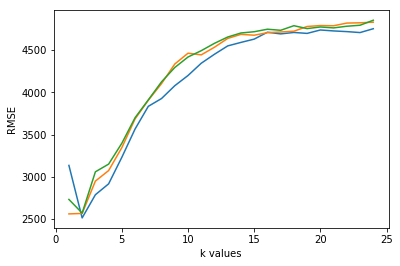

In [147]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel("k values")
    plt.ylabel("RMSE")

In [148]:
# Calculate the average rmses for each of the feature set
avg_rmses ={}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.items()))
    avg_rmses[k] = avg_rmse

series_avg_rmses = pd.Series(avg_rmses)
series_avg_rmses.sort_values()

four best features    2073.385542
five best features    2109.519704
six best features     2121.021288
dtype: float64

### Inference -
From the above output we can infer that the "Four best features" of ['horsepower', 'width', 'curb-weight', 'city-mpg'] produces the least error. Further more we can go through the k values for this feature to determine wich produces the least average RMSE. 

In [149]:
rmses_for_four_best_features = k_rmse_results["four best features"]
series_rmses_for_four_best_features = pd.Series(rmses_for_four_best_features)
print('Sorted RMSE values for eack k for the four best features which are - {}'.format(four_best_features))
series_rmses_for_four_best_features.sort_values()

Sorted RMSE values for eack k for the four best features which are - ['horsepower', 'width', 'curb-weight', 'city-mpg']


2     2514.181201
3     2788.551942
4     2917.467994
1     3135.548907
5     3232.103629
6     3566.725419
7     3834.980481
8     3927.395249
9     4078.976584
10    4199.837627
11    4345.006990
12    4451.387011
13    4550.163468
14    4591.534016
15    4630.399643
17    4692.337273
19    4698.196274
23    4707.956340
18    4709.187224
16    4711.911798
22    4719.336960
21    4727.351846
20    4738.548781
24    4753.419374
dtype: float64

Next steps:
We can take the Multivariate model to the next level by using k-fold cross validation instead of the train-test validation.

- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well.

In [150]:
# First, let's tackle the first challenge which is to - modify the knn_train_test method to use k-fold cross validation.
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(train_cols, target_col, folds, df):
    k_fold_avg_rmse = {}
    for fold in folds:
        kf = KFold(fold, shuffle = True, random_state=1)
        knn = KNeighborsRegressor()
        mses = cross_val_score(knn, df[train_cols], df[target_col], scoring = 'neg_mean_squared_error', cv = kf)
        rmses = [ np.sqrt(np.absolute(mse)) for mse in mses]
        avg_rmse = np.mean(rmses)
        k_fold_avg_rmse[fold] = avg_rmse
        
    return k_fold_avg_rmse

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', num_folds, numeric_cars)
k_rmse_results['two best features'] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', num_folds, numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', num_folds, numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', num_folds, numeric_cars)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', num_folds, numeric_cars)
k_rmse_results['six best features'] = rmse_val

k_rmse_results
#series_k_rmse_results = pd.Series(k_rmse_results)
#series_k_rmse_results.sort_values()

{'five best features': {3: 3175.9402031590848,
  5: 3091.3731809925912,
  7: 3118.1829269805576,
  9: 3004.4578668268382,
  10: 2965.9098701989278,
  11: 2942.2632761907244,
  13: 2999.7427515362037,
  15: 2921.0543901024635,
  17: 2851.5061737153796,
  19: 2845.6040378563694,
  21: 2810.9761289714083,
  23: 2736.2816064500817},
 'four best features': {3: 3007.8094892956906,
  5: 2796.6615474274058,
  7: 2877.1739543355402,
  9: 2789.7816169934335,
  10: 2702.9257037398665,
  11: 2723.2826837194684,
  13: 2788.4719202435181,
  15: 2737.7984407671142,
  17: 2691.12833243266,
  19: 2672.0461599688751,
  21: 2627.3429036225962,
  23: 2584.1561561042695},
 'six best features': {3: 3114.115199109081,
  5: 3025.4280122138061,
  7: 2996.0176080080864,
  9: 2903.319941603032,
  10: 2942.5330249553981,
  11: 2853.9199749279173,
  13: 2911.5145298237921,
  15: 2864.7767398246478,
  17: 2781.5016978803365,
  19: 2779.8668568174476,
  21: 2726.3976245128824,
  23: 2661.2984439673837},
 'three best

So, which among the best features has the least average RMSE


In [151]:
k_avg_rmse_results = {}
for k,v in k_rmse_results.items():
    k_avg_rmse_results[k] = np.mean(list(v.items()))
series_k_avg_rmse_results = pd.Series(k_avg_rmse_results)
series_k_avg_rmse_results.sort_values()

four best features     1381.315788
three best features    1422.445335
six best features      1446.403736
five best features     1484.012184
two best features      1630.367617
dtype: float64

In [154]:
# In this code section we will modify the knn_train_test() function to perform the data cleaning as well.
# We will read the data all over again in a data frame and filter out columns that are non numeric and 
# feed that data frame into the train test method.

cars2 = pd.read_csv(file, sep=",", header=None, names=column_names)
#print(cars2.head(3))
numeric_cars2 = cars[continuous_values_cols]

#print('------------------------numeric columns dataframe---------------------------')
#print(numeric_cars2.head(3))
def knn_train_test(train_cols, target_col, folds, df):
    # Clean the data from any null values 
    df = df.replace("?", np.nan)
    df = df.astype('float')
    
    # Since target_col is the column we want to predict let's remove any rows with a missing target_col
    df = df.dropna(subset=[target_col])
    
    # Replace missing values in other columns using columns means
    df = df.fillna(df.mean())
    
    # Normalize all columns in the range 0 to 1, except the target column
    orig_target_column = df[target_col]
    df = (df.max() - df)/(df.max())
    df[target_col] = orig_target_column
    
    
    k_fold_avg_rmse = {}
    for fold in folds:
        kf = KFold(fold, shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        mses = cross_val_score(knn, df[train_cols], df[target_col], scoring ='neg_mean_squared_error', cv=kf)
        rmses = [np.sqrt(np.absolute(mse)) for mse in mses]
        k_fold_avg_rmse[fold] = np.mean(rmses)
        
    return k_fold_avg_rmse

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]


k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', num_folds, numeric_cars2)
k_rmse_results['two best features'] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', num_folds, numeric_cars2)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', num_folds, numeric_cars2)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', num_folds, numeric_cars2)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', num_folds, numeric_cars2)
k_rmse_results['six best features'] = rmse_val

k_avg_rmse_results = {}
for k, v in k_rmse_results.items():
    k_avg_rmse_results[k] = np.mean(list(v.items()))
    
series_k_avg_rmse_results = pd.Series(k_avg_rmse_results)
series_k_avg_rmse_results.sort_values()

four best features     1381.315788
three best features    1422.445335
six best features      1446.403736
five best features     1484.012184
two best features      1630.367617
dtype: float64

### Inference
In conclusion we modified the knn_train_test method to perform data cleaning and was able to produce the same output from the previous code section.